# 코드 필사
- 링크: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Part1. EDA (Exploratory Data Analysis)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight') # stylesheet 설정
import warnings 
warnings.filterwarnings('ignore') # 경고 메세지 숨기기
# 그림이 브라우저 내부(inline)에 그려지도록 함
%matplotlib inline 

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking for total null values
# Age, Cabin, Embarked have null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

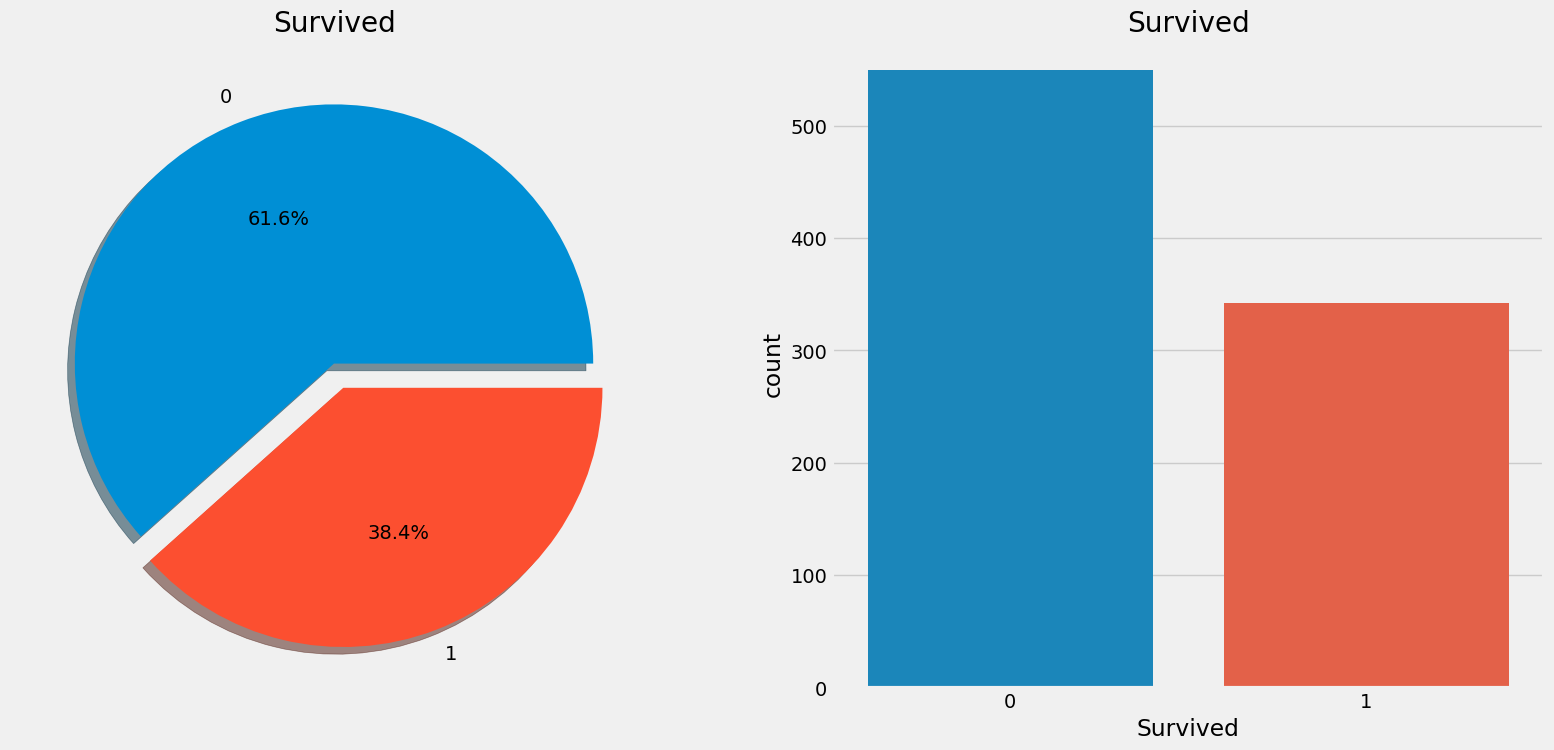

In [5]:
# How many Survived?

f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- It is evident that not many passengers survived(Only 38.4%).
- We need to dig down more to get better insights to see which categories of the passengers did survive and who didn't.
- We'll see survival rates by using different features of the dataset including Sex, Age, Port of embarcation, etc.
- First let us understand the different types of features.

### Types of Features
1. Categorical : Sex, Embarked
2. Ordinal : Pclass
3. Continuous : Age
4. Discrete : Sibsp

## 1) Analysis of features

#### 1. Sex - categorical

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


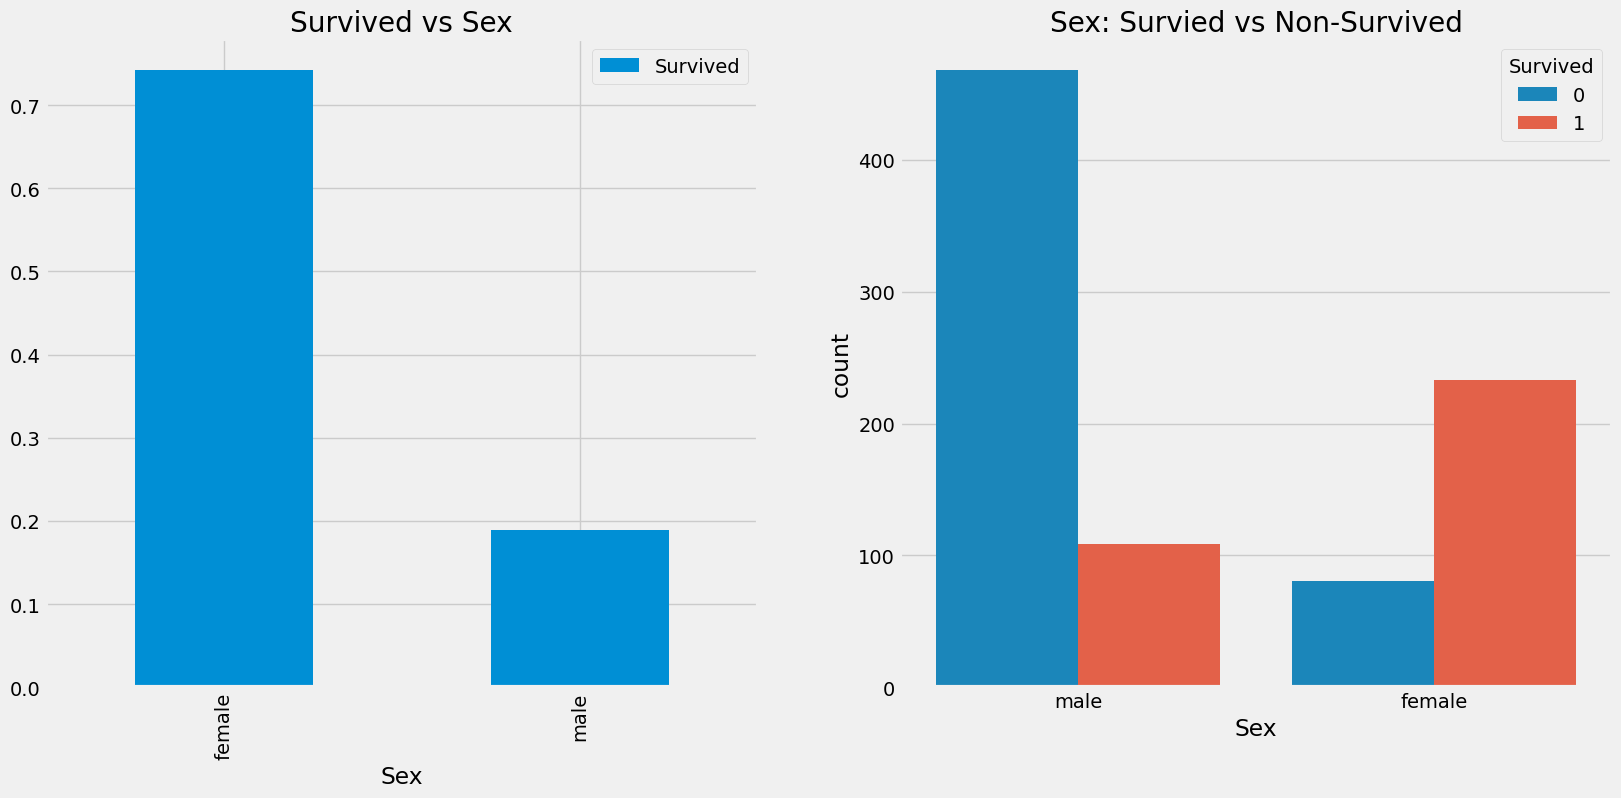

In [8]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survied vs Non-Survived')
plt.show()

- The survival rate for women is around 75% while that for men is around 19%
- The number of men is a lot more than that of women

#### 2. Pclass - ordinal


In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


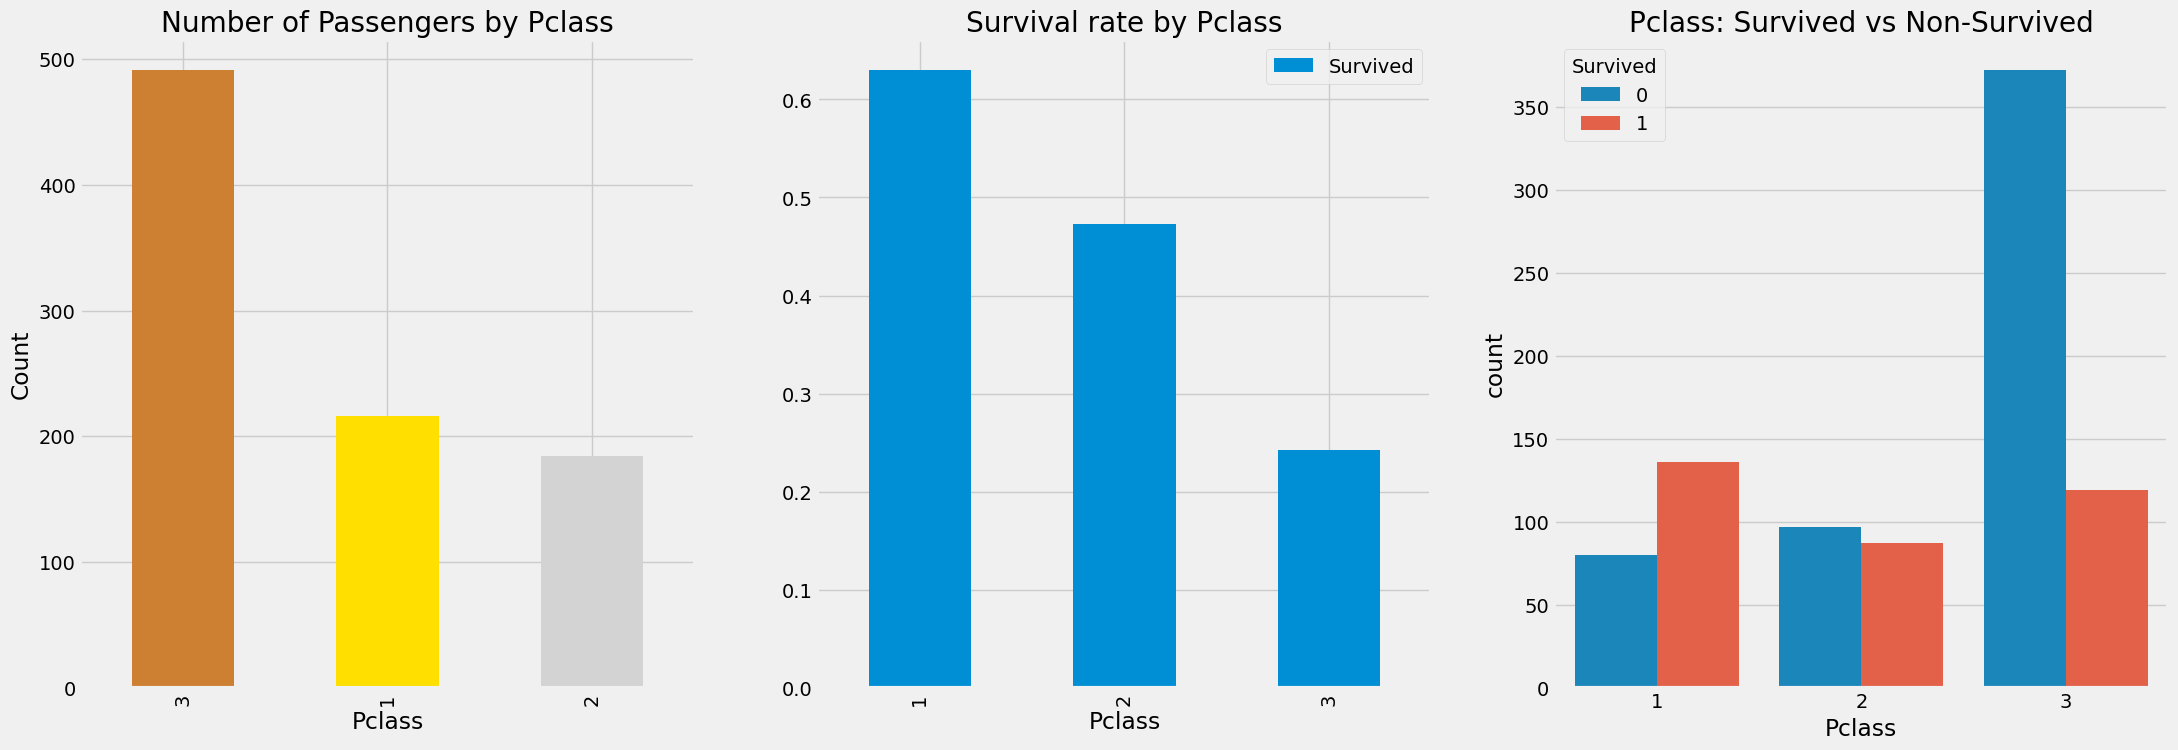

In [10]:
f, ax = plt.subplots(1,3, figsize=(24,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

(data[['Pclass', 'Survived']].groupby('Pclass').sum() / data[['Pclass', 'Survived']].groupby('Pclass').count()).plot.bar(ax=ax[1])
ax[1].set_title('Survival rate by Pclass')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[2])
ax[2].set_title('Pclass: Survived vs Non-Survived')
plt.show()

- We can clearly see that Pclass1 passengers were given a very high priority during thr rescue. 
- Even though the number of Pclass3 passengers is a lot higher, still the number of survivors is very low.
- For Pclass1 the survival rate is around 63% while for Pclass2 is around 48% and Pclass3 around 24%.
- Let's check survival rate with Sex & Pclass together.

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

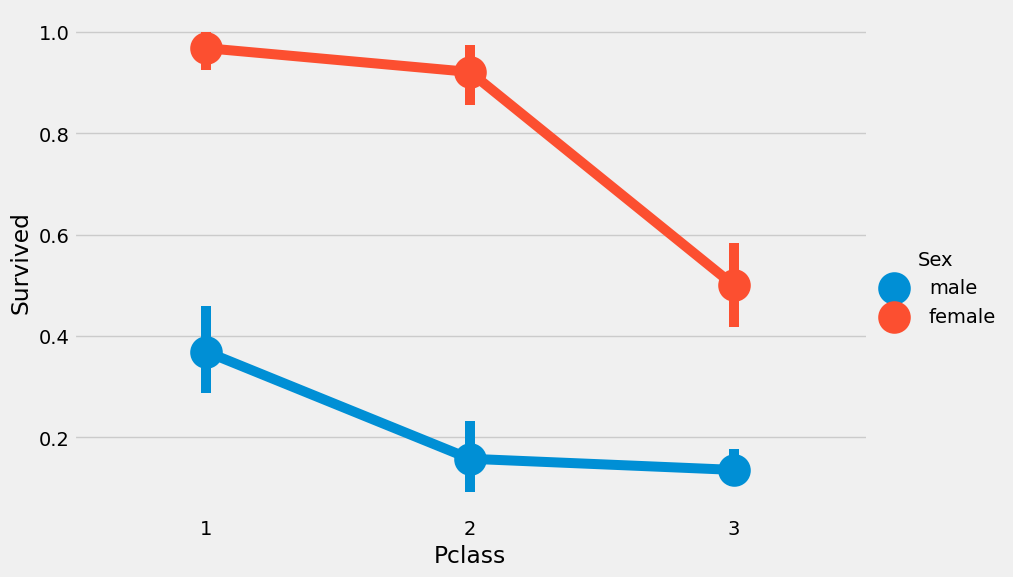

In [12]:
sns.catplot(x='Pclass', y='Survived', hue = 'Sex', kind='point', height=6, data=data, aspect=1.5)

- It is evident that irrespective of Pclass, women were given first priority during rescue. Even men from Pclass1 have a very low survival rate.
- Also it looks like Pclass is an important feature.

#### 3. Age - continuous


In [13]:
data['Age'].describe()[['min', 'max', 'mean']]

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64

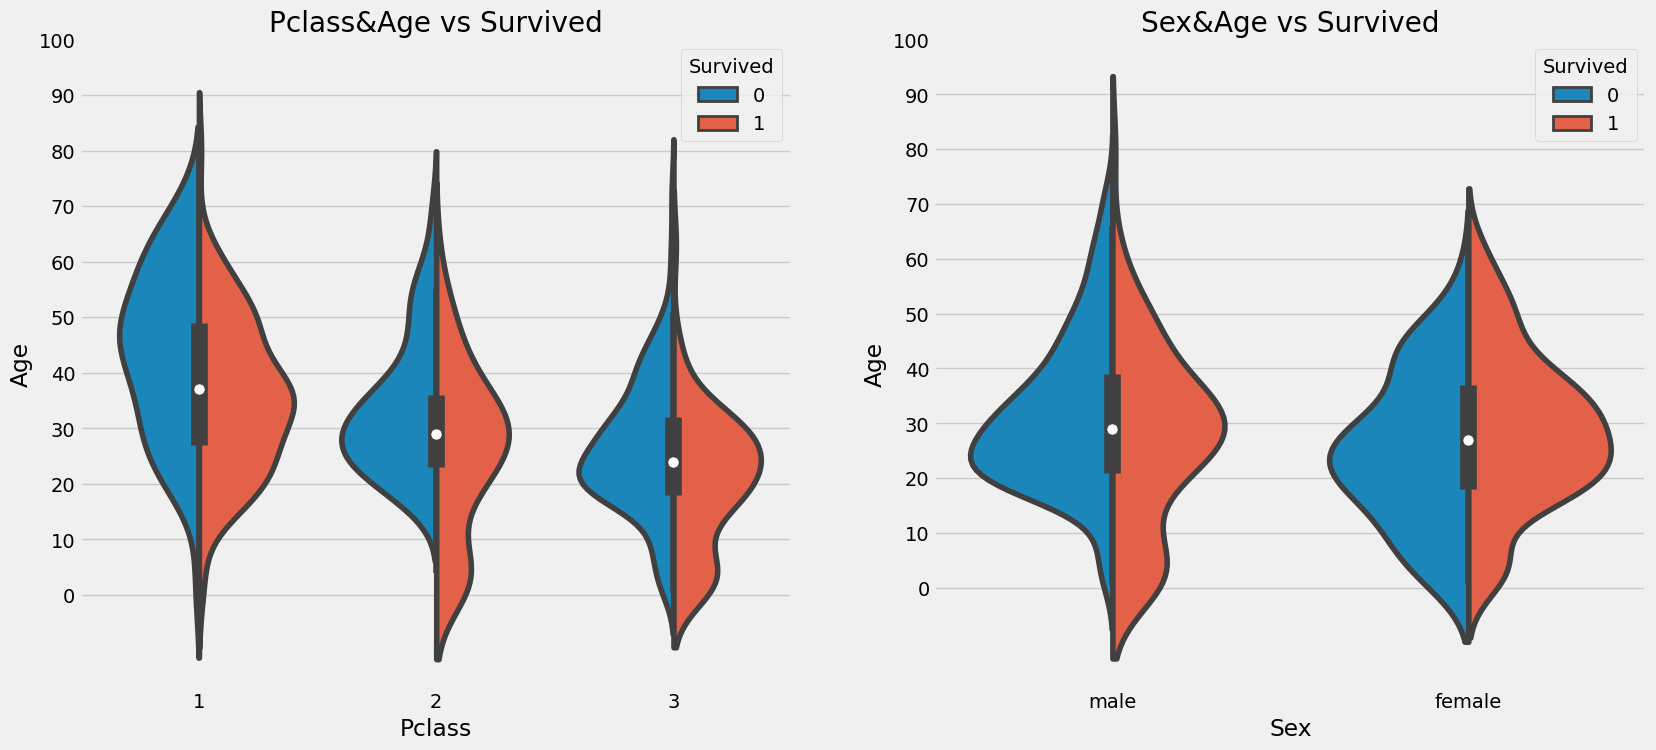

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass&Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex',y='Age',hue='Survived',data=data, split=True, ax=ax[1])
ax[1].set_title('Sex&Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- The number of children increases with Pclass and the survival rate for Age below 10 is high irrespective of the Pclass.
- Survival chance for passengers aged 20-50 of Pclass1 is high and is even better for women.
- For male, the survival chance decreases with an increase in age.

In [15]:
data['Age'].isnull().sum()

177

##### Null values of Age
- To replace 177 null values of Age, we can assign the mean value of the dataset, but there are many people with many different ages.
- We can find out what age-band the passengers lie by checking the 'Name' feature.
- Looking upon the feature, we can see that the names have a salutation like Mr of Mrs. Thus we can assign the mean values of Mr and Mrs to the repective groups.

In [16]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
data['Initial'] = 0

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [18]:
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [19]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- We can replace some misspelled initials with some other values.

In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [21]:
data_n = data[['Name','Initial','Age','Sex']]
data_n[data_n['Initial']=='Other']

,Name,Initial,Age,Sex
149,"Byles, Rev. Thomas Roussel Davids",Other,42.0,male
150,"Bateman, Rev. Robert James",Other,51.0,male
249,"Carter, Rev. Ernest Courtenay",Other,54.0,male
626,"Kirkland, Rev. Charles Leonard",Other,57.0,male
647,"Simonius-Blumer, Col. Oberst Alfons",Other,56.0,male
694,"Weir, Col. John",Other,60.0,male
822,"Reuchlin, Jonkheer. John George",Other,38.0,male
848,"Harper, Rev. John",Other,28.0,male
886,"Montvila, Rev. Juozas",Other,27.0,male


- Rev: a title for a priest of Christian Church, usually for men
- Col: a rank of the British Army and Royal Marines
- Jonkheer: a title of nobility in Netherlands, typically given to male member of the nobility

In [22]:
# number of members in each Initial group
data.groupby('Initial')['Initial'].count()

Initial
Master     40
Miss      186
Mr        529
Mrs       127
Other       9
Name: Initial, dtype: int64

In [23]:
# average number of Initial groups
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

##### Filling Null values of Age
- Assigning NaN values with the Ceil values of the mean ages

In [24]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [25]:
# Now no null values left.
data['Age'].isnull().any()

False

In [26]:
data[data['Survived']==0]['Age']

0      22.0
4      35.0
5      33.0
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888    22.0
890    32.0
Name: Age, Length: 549, dtype: float64

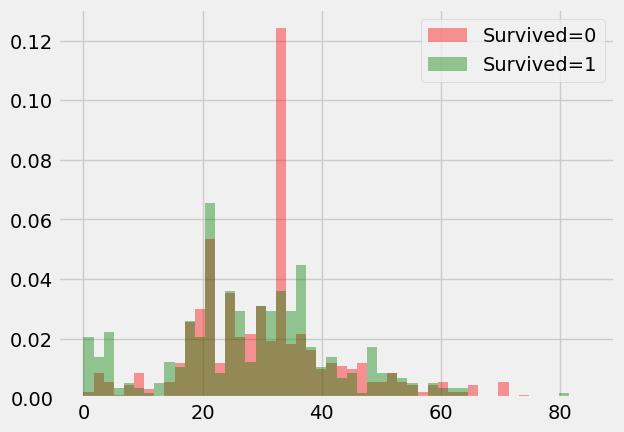

In [27]:
plt.hist(data[data['Survived']==0]['Age'], color = 'red', alpha = 0.4, bins = 50, range = [0,85], label = 'Survived=0', density = True)
plt.hist(data[data['Survived']==1]['Age'], color = 'green', alpha = 0.4, bins = 50, range = [0,85], label = 'Survived=1', density = True)
plt.legend()
plt.show()

- The toddlers(age<5) were saved in large numbers.
- The oldest was saved(80 years old).
- Maximum number of deaths were in age group of 30~40.

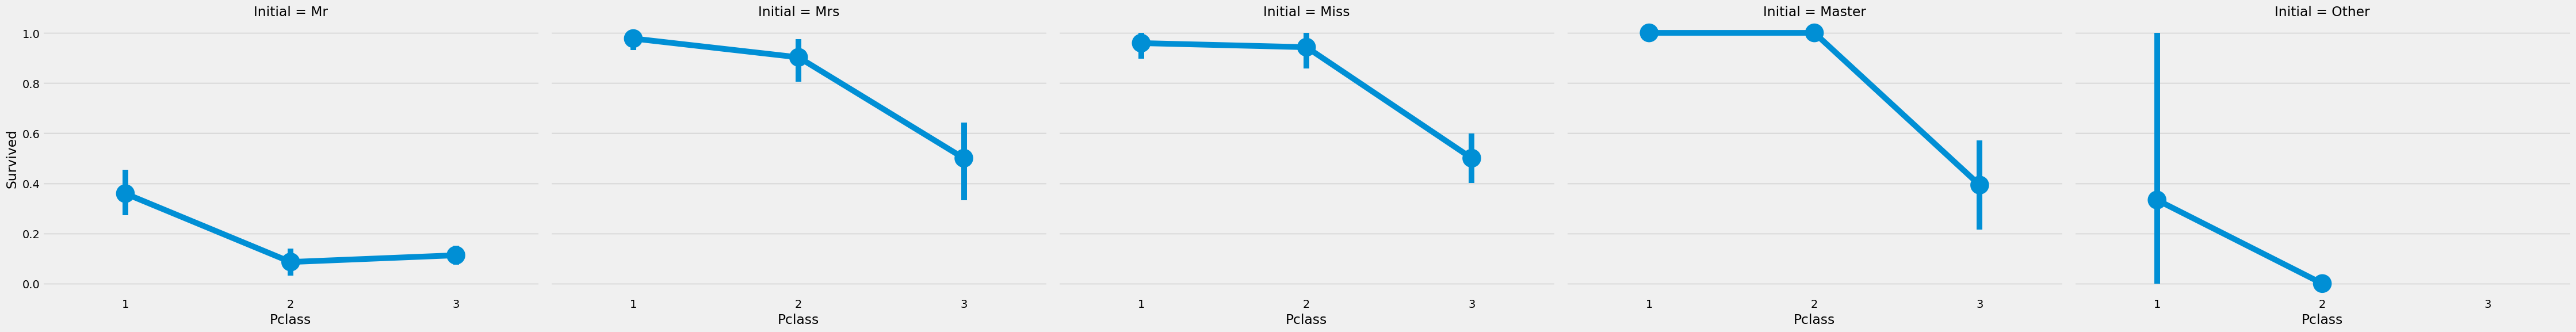

In [28]:
sns.catplot(x='Pclass', y='Survived', col = 'Initial', kind='point', height=6, data=data, aspect=1.5)

- The Women and Children first policy thus holds true irrespective of the class.

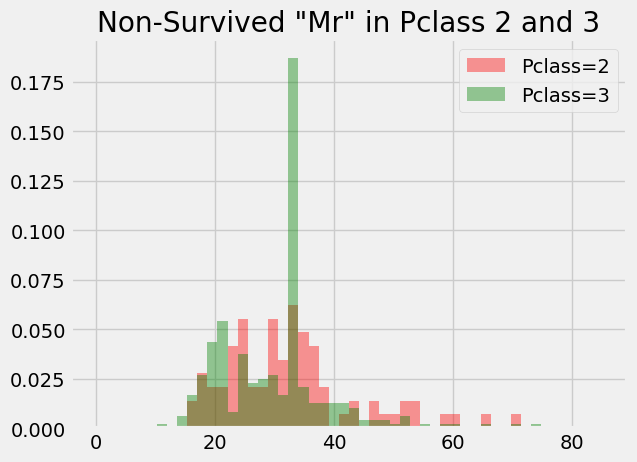

In [29]:
plt.hist(data.loc[(data['Pclass']==2) & (data['Initial']=='Mr') & (data['Survived']==0), 'Age'], color = 'red', alpha = 0.4, bins = 50, range = [0,85], label = 'Pclass=2', density = True)
plt.hist(data.loc[(data['Pclass']==3) & (data['Initial']=='Mr') & (data['Survived']==0), 'Age'], color = 'green', alpha = 0.4, bins = 50, range = [0,85], label = 'Pclass=3', density = True)
plt.title('Non-Survived "Mr" in Pclass 2 and 3')
plt.legend()
plt.show()

#### 4. Embarked - categorical

In [30]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

[]

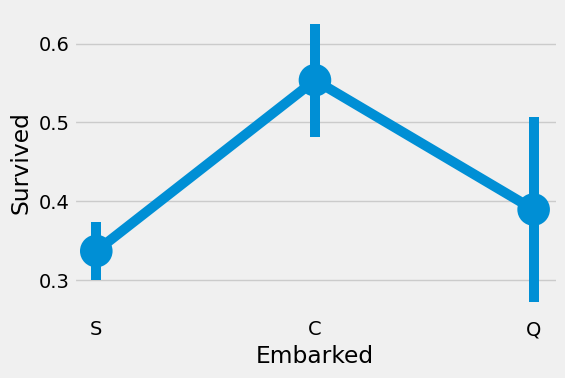

In [31]:
sns.catplot(x='Embarked', y='Survived', kind='point', height=4, data=data, aspect=1.5)
plt.plot()

- The chance of survival for port C is the highest around 0.55 while it is lowest for S.

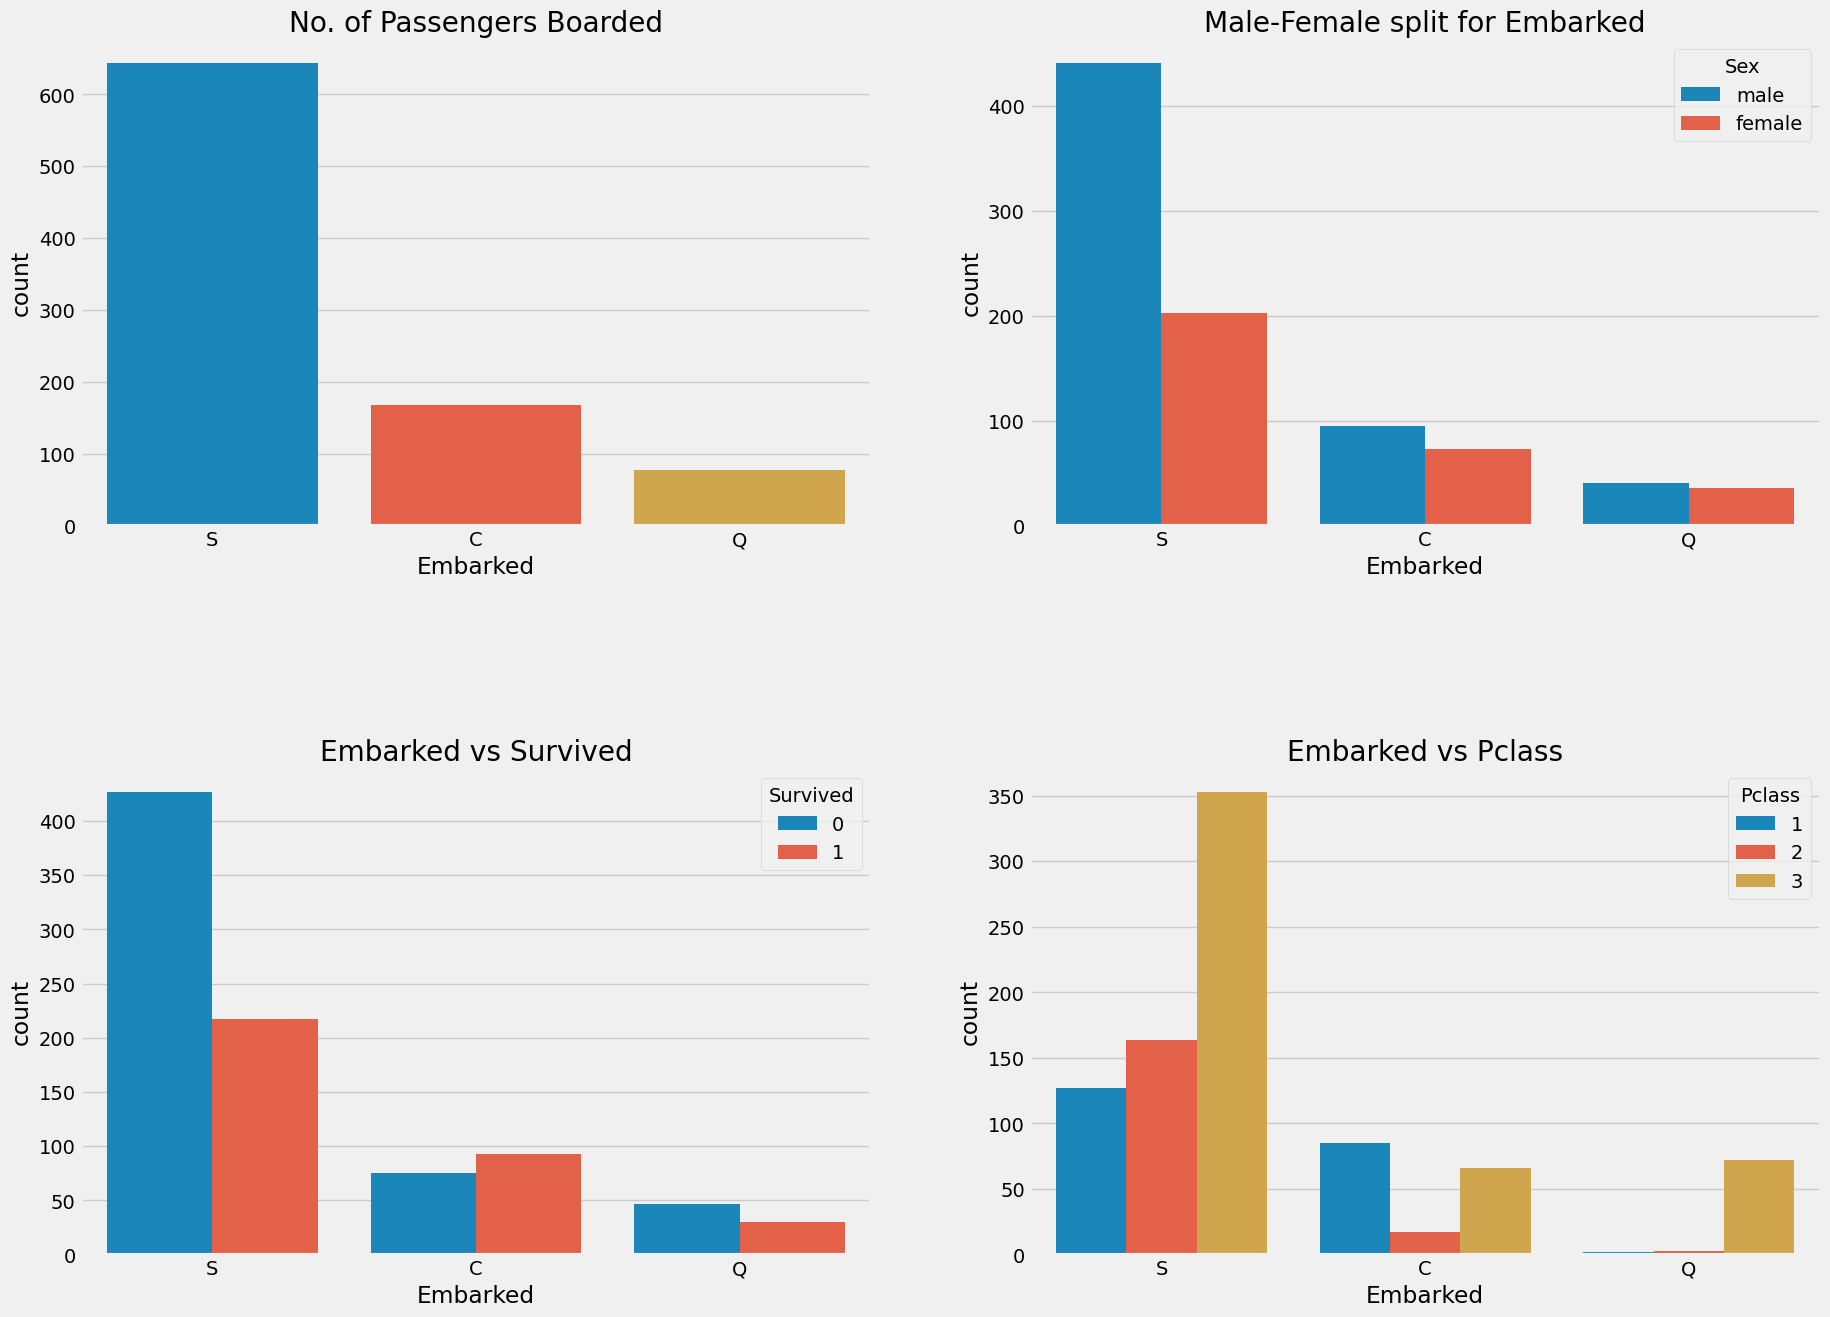

In [32]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Maximum number of passengers boarded from S and majority of them is from Pclass3.
- The passengers from C showed a good proportion of survival since ratio of passengers from Pclass 1 and 2 is relatively high.
- Port Q had almost 95% of the passengers from Pclass3.

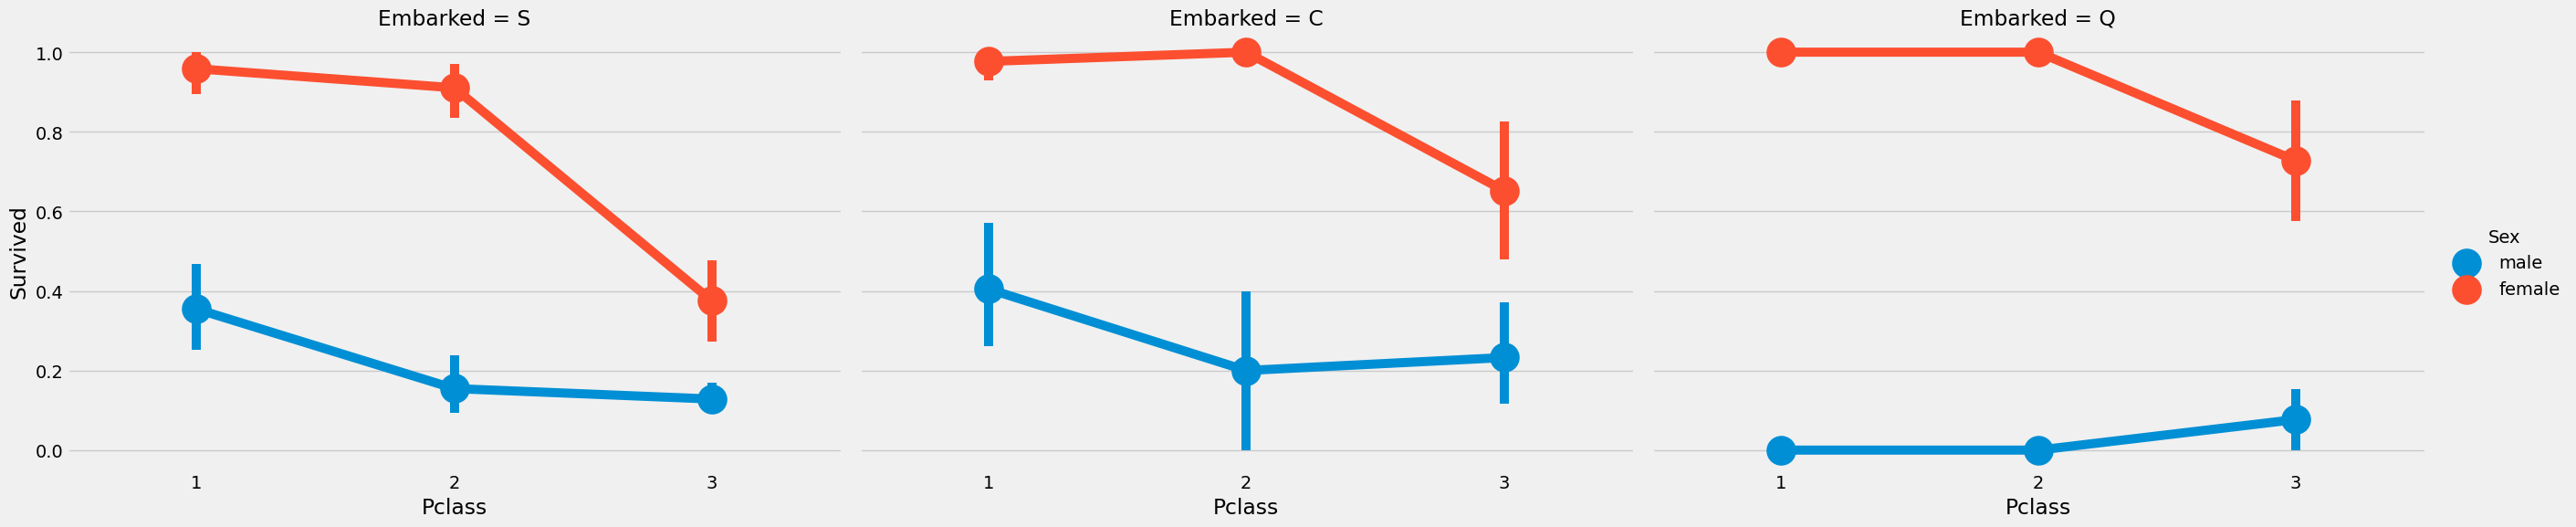

In [33]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col = 'Embarked', kind='point', height=6, data=data, aspect=1.5)

- The survival chances are almost 1 for women in Pclass1 and 2 irrespective of the Port.
- Port S seems to be very unlucky for Pclass3 passengers as the survival rate for both men and women is very low.
- Port Q looks like the unluckiest for men, as almost all were from Pclass3.

##### Filling Null values of Embarked
- As we can see, maximum number of passengers boarded from Port S so we replace NaN with S.

In [34]:
data['Embarked'].isnull().sum()

2

In [35]:
data.groupby(['Embarked'])['Embarked'].count() / len(data['Embarked'])

Embarked
C    0.188552
Q    0.086420
S    0.722783
Name: Embarked, dtype: float64

In [36]:
data['Embarked'].fillna('S', inplace=True)

In [37]:
data['Embarked'].isnull().any()

False

#### 5. SibSp - discrete
- This feature represents whether a person is alone or with one's family members.
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife

In [38]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


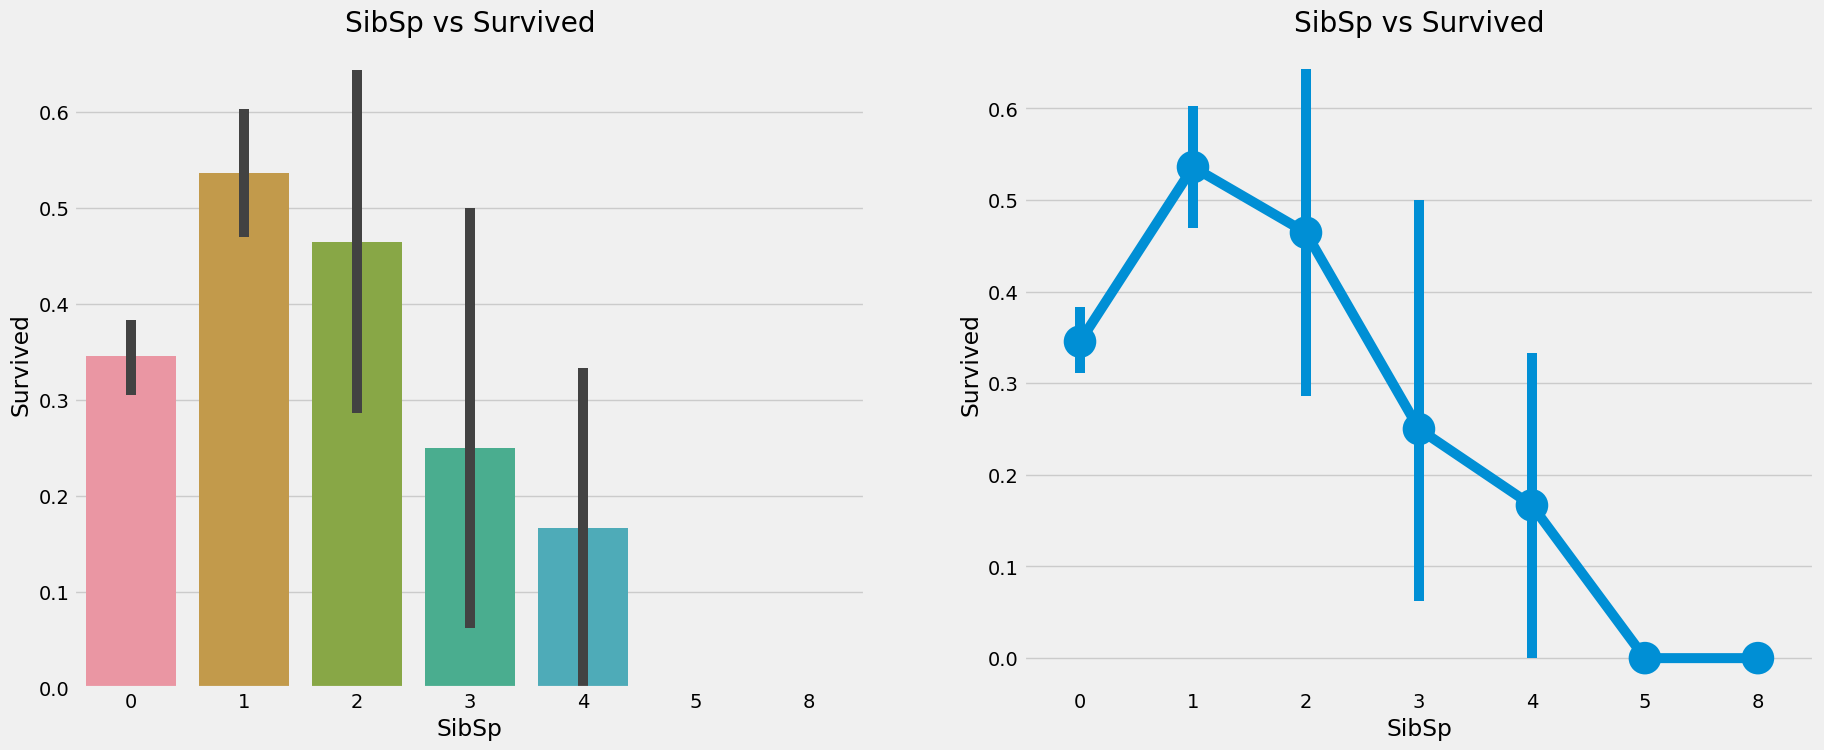

In [39]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [40]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Plots above show that a passenger with no sibling or spouse had survival rate of 34.5%.
- The survival rate of passengers with 1 sibling of spouse was the hightest, and graph roughly decreases when the number of SibSp increases. That is, if you have any family member on board, you'll try to save them instead of saving yourself first.
- The survival rate for families with 5~8 members is 0%, as they were all from Pclass3.

#### 6. Parch - discrete
- This feature represents whether a person with one's parents or children or not.

In [41]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- This crosstab again shows that large families were in Pclass 3.

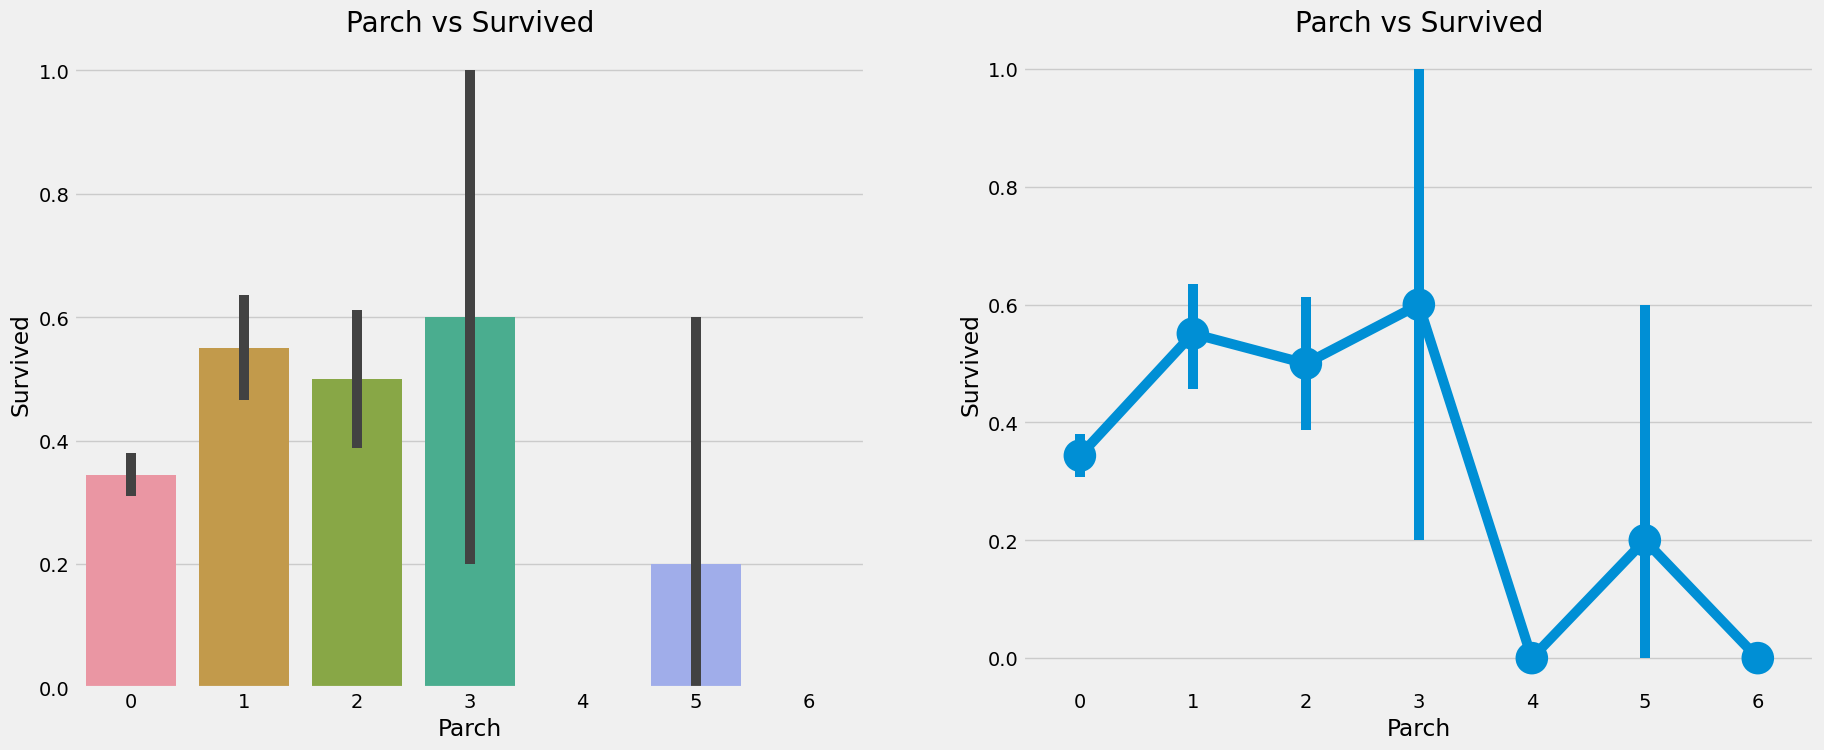

In [42]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

- The result is quite similar to SibSp's result. Passengers with 1~3 parents or children had greater chance of survival and it reduces as the number goes up.
- Having more than 4 parents or children proves to be fatal.

#### 7. Fare - continuous


In [43]:
data['Fare'].describe()[['max', 'min', 'mean']]

max     512.329200
min       0.000000
mean     32.204208
Name: Fare, dtype: float64

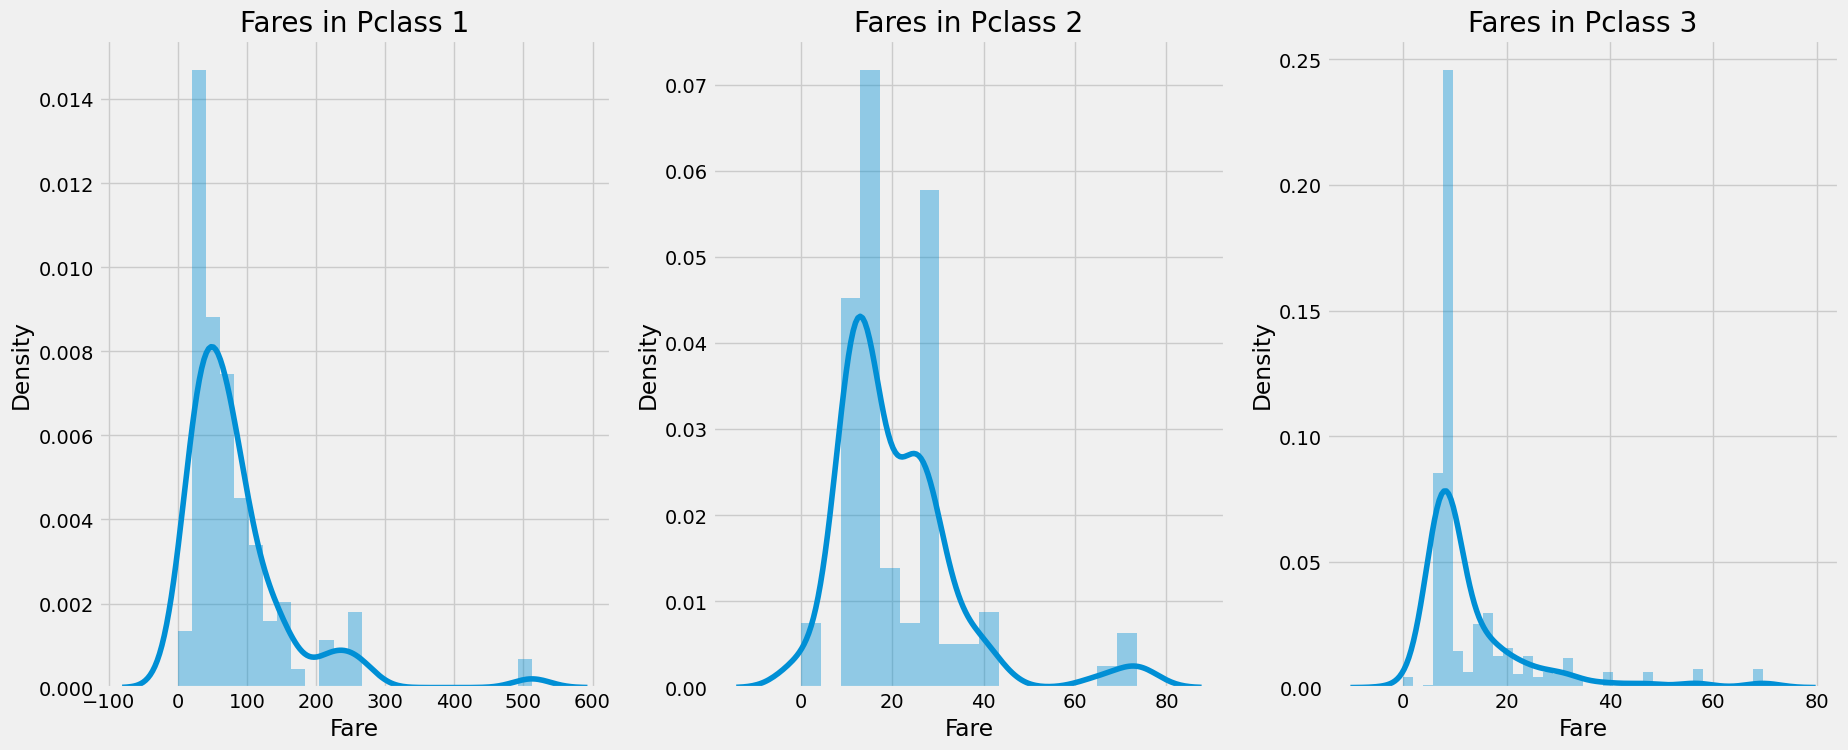

In [44]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- We can convert this into discrete values using binning.

### Observations in an nutshell for all features...
- Sex: The chance of survival for women is high as compared to men
- Pclass: The chance of survival for Pclass 1 is high and one for Pclass 3 is low. For women, the chance of survival for Pclass 1 and 2 is very high.
- Age: Children less than 5 ~ 10 years do have a high chance of survival. Passengers between age group 15 ~ 35 died a lot.
- Embarked: The chance of survival at C seems better even though the majority of Pclass1 got up at S. Passengers at Q were almost all from Pclass3.
- Parch + SibSp: Having 1 ~ 2 SibSp or 1 ~ 3 Parch shows a greater chance of survival than being alone or having a large family travelling with you.

## 2) Finding any relations or trends considering multiple features

#### Correlation between the features

In [45]:
data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


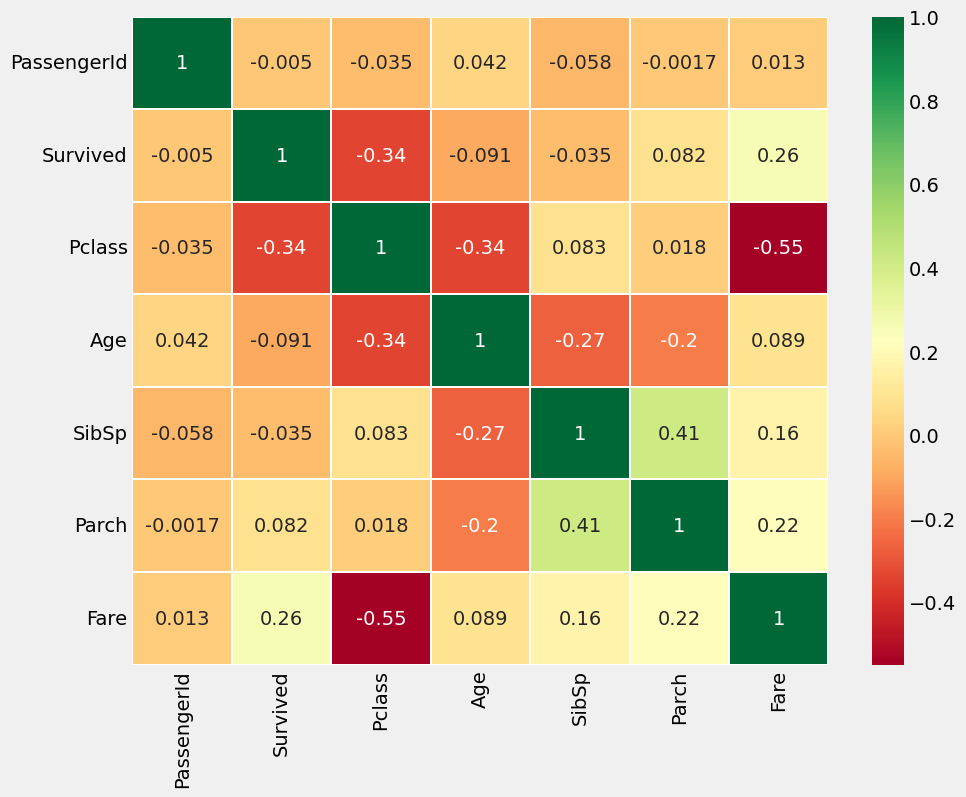

In [46]:
sns.heatmap(data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- Lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

- So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

- Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

# Part2. Feature Engineering & Data Cleaning

## 1) Adding any new features

## 2) Removing redundant features

## 3) Converting features into suitable form for modeling

# Part3. Predictive Modeling

## 1) Running Basic Algorithms

## 2) Cross Validation

## 3) Ensembling

## 4) Important Features Extraction